In [1174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,roc_auc_score,f1_score,recall_score,roc_curve,auc,precision_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
import joblib as joblib
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype,is_numeric_dtype

In [1175]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1176]:
df=pd.read_csv('Brazil_Covid_19_Dataset.csv')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [1177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


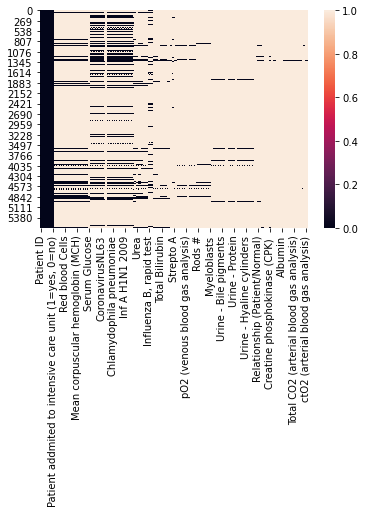

In [1178]:
sns.heatmap(data=df.isna())

In [1179]:
df_positive=df[df['SARS-Cov-2 exam result']=='positive']
df_positive

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,78511c183ae18bc,7,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,d7834ed75f2da44,16,positive,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,b16b49f7bd3e692,10,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

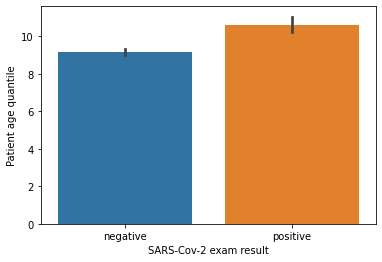

In [1144]:
sns.barplot(data=df,x='SARS-Cov-2 exam result',y='Patient age quantile')
#People with age quantile 11+ having covid confirmed case 

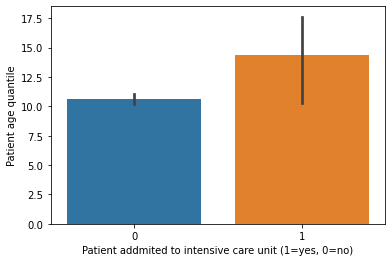

In [1145]:
sns.barplot(data=df_positive,x='Patient addmited to intensive care unit (1=yes, 0=no)',y='Patient age quantile')
#People with age quantile 14 are admited in intensive care unit

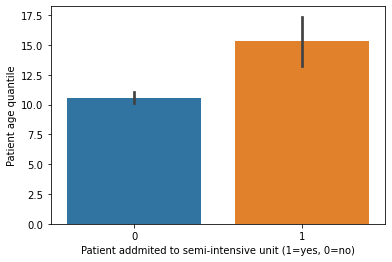

In [1146]:
sns.barplot(data=df_positive,x='Patient addmited to semi-intensive unit (1=yes, 0=no)',y='Patient age quantile')
#People with age quantile 15+ are admited in semi intensive care unit


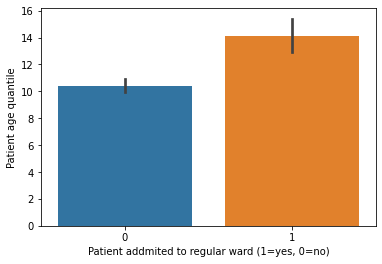

In [1147]:
sns.barplot(data=df_positive,x='Patient addmited to regular ward (1=yes, 0=no)',y='Patient age quantile')
#People with age quantile 14 are admited in general ward

In [1148]:
df.shape

(5644, 111)

In [1149]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [1150]:
for col in df.columns:
    if(is_numeric_dtype(df[col])):
        if(df[col].isna().sum()>0):
            df[col]=df[col].replace(np.nan,0)
    else:
        if(df[col].isna().sum()>0):
            df[col]=df[col].replace(np.nan,'NA')

In [1151]:
df=df.drop(['Patient ID','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1)


In [1152]:
df.sample(10)

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
2701,4,negative,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NA,NA,NA,NA,NA,NA,0.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,NA,NA,NA,0.0,NA,NA,0.0,NA,NA,0.0,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,11,negative,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NA,NA,NA,NA,NA,NA,0.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,NA,NA,NA,0.0,NA,NA,0.0,NA,NA,0.0,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2882,5,negative,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NA,NA,NA,NA,NA,NA,0.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,NA,NA,NA,0.0,NA,NA,0.0,NA,NA,0.0,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,13,negative,0.740064,0.60422,-0.040064,-0.325903,0.89537,0.804521,-0.353319,-0.985104,1.608988,-0.605899,0.470813,-0.494784,-0.377823,0.171035,0.52561,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected

In [1153]:
df.isna().sum()

Patient age quantile                                0
SARS-Cov-2 exam result                              0
Hematocrit                                          0
Hemoglobin                                          0
Platelets                                           0
Mean platelet volume                                0
Red blood Cells                                     0
Lymphocytes                                         0
Mean corpuscular hemoglobin concentration (MCHC)    0
Leukocytes                                          0
Basophils                                           0
Mean corpuscular hemoglobin (MCH)                   0
Eosinophils                                         0
Mean corpuscular volume (MCV)                       0
Monocytes                                           0
Red blood cell distribution width (RDW)             0
Serum Glucose                                       0
Respiratory Syncytial Virus                         0
Influenza A                 

In [1154]:
df.isin([0]).sum()

Patient age quantile                                 334
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Serum Glucose                                       5436
Respiratory Syncytial Virus    

In [1155]:
df=df.drop(['Mycoplasma pneumoniae','Myeloblasts','Fio2 (venous blood gas analysis)','Urine - Sugar','Partial thromboplastin time (PTT) ','Prothrombin time (PT), Activity','D-Dimer'],axis=1)
df.sample()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
1562,13,negative,0.740064,0.60422,-0.040064,-0.325903,0.89537,0.804521,-0.353319,-0.985104,1.608988,-0.605899,0.470813,-0.494784,-0.377823,0.171035,0.52561,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.70923,0.230425,0.154131,-0.563567,-0.552949,0.503132,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,NA,NA,NA,0.0,NA,NA,NA,NA,0.0,NA,NA,NA,NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1156]:
df.isin([0]).sum()

Patient age quantile                                 334
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Serum Glucose                                       5436
Respiratory Syncytial Virus    

In [1157]:
df.isin(['NA']).sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                             0
Hemoglobin                                             0
Platelets                                              0
Mean platelet volume                                   0
Red blood Cells                                        0
Lymphocytes                                            0
Mean corpuscular hemoglobin concentration (MCHC)       0
Leukocytes                                             0
Basophils                                              0
Mean corpuscular hemoglobin (MCH)                      0
Eosinophils                                            0
Mean corpuscular volume (MCV)                          0
Monocytes                                              0
Red blood cell distribution width (RDW)                0
Serum Glucose                                          0
Respiratory Syncytial Virus    

In [1158]:
#convert string data to int
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [1159]:
df.describe()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5644.00000,5644.000000,5644.000000,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,9.318391,0.098866,-2.336995e-10,-1.707654e-09,-4.075124e-11,7.826010e-10,8.977675e-10,-8.387668e-10,1.043586e-10,6.633186e-10,-7.034019e-10,-3.603827e-10,7.622254e-10,-4.425939e-10,-3.481573e-10,1.088590e-09,2.604536e-10,0.470588,0.476612,0.466159,0.478561,0.471120,0.411942,0.475549,0.477321,0.477498,0.476790,0.475726,0.477498,0.477675,0.461729,0.478738,0.476612,0.239546,5.354359e-10,-4.718285e-10,2.475195e-10,-5.010631e-10,1.349575e-09,7.250177e-10,0.153969,0.154500,1.093196e-10,-2.108433e-11,-4.163714e-11,-8.469171e-11,3.889086e-10,1.022325e-10,-5.226789e-11,1.695606e-10,0.071049,-3.703047e-11,-4.663359e-10,3.633948e-10,-2.551382e-11,-1.911765e-10,-2.202339e-10,8.71722

In [1160]:
data=df.corr()
data

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,7.524442e-02,0.031292,0.019498,-0.051183,0.038392,-0.012099,-0.040620,-0.040213,-0.053667,0.034682,0.063669,0.007124,0.090847,0.016385,0.053681,3.863169e-02,-0.004644,-0.018124,-0.010242,-0.017652,-0.018663,-0.001011,-0.018832,-0.018431,-0.017502,-0.013473,-0.014038,-0.017466,-0.017221,-0.011411,-0.016905,-0.016024,-0.017278,0.024183,8.784693e-02,0.026245,9.878465e-02,4.757394e-04,-1.231100e-03,-1.306364e-01,-1.338172e-01,2.692310e-02,8.113304e-03,4.095997e-02,2.739161e-02,5.040233e-02,1.513602e-03,-8.381236e-02,-3.798327e-02,-1.416420e-01,-1.233002e-02,3.668069e-02,-1.047071e-02,9.792429e-02,-1.257379e-02,8.872754e-02,4.522417e-02,9.010249e-02,7.478360e-03,4.560341e-02,2.086722e-02,2.875265e-02,1.433740e-02,1.154899e-02,7.090032e-03,-2.079960e-02,2.027956e-02,1.530105e-02,2.975332e-02,1.539552e-02,-1.519122e-02,1.576571e-02,6.880156e-03,-6.702015e-03,-2.690176e-02,2.048943e-02,1.123229e-02,1.117166e-02,1.377534e-02,1.181027e-02,-1.822655e-02,2.446242e-03,-2.240948e-02,4.883140e-03,-1.500231e-02,2.721363e-02,7.063568e-03,-1.215658e-02,-7.563036e-03,-1.628616e-02,-3.411040e-02,4.148422e-02,4.150677e-02,6.263816e-03,1.208974e-02,-7.157476e-03,-2.123879e-02,-4.135060e-02,-4.455310e-03
SARS-Cov-2 exam result,0.075244,1.000000e+00,0.037396,0.039530,-0.106482,0.040622,0.045766,-0.005749,0.017285,-0.108835,-0.023763,-0.010744,-0.072659,-0.020835,0.074431,-0.015035,-4.425545e-03,-0.027175,-0.029288,-0.027726,-0.029950,-0.029459,-0.009191,-0.028903,-0.029520,-0.029582,-0.029335,-0.028965,-0.030279,-0.029643,-0.023993,-0.030012,-0.029274,-0.030134,-0.013552,-2.188264e-02,0.024927,2.649977e-02,-2.732894e-02,-2.899481e-02,-3.385687e-02,-3.722505e-02,2.904678e-02,3.874134e-02,2.894489e-02,-3.122162e-02,-1.777600e-02,-3.521736e-02,-1.355736e-02,-3.126552e-02,-4.754891e-02,-8.156810e-03,-1.436311e-03,9.800339e-04,1.894955e-02,4.810775e-04,1.007429e-02,1.628087e-02,1.130392e-02,1.617132e-02,2.376710e-02,-

In [1161]:
data=df.corr()
data
#Myeloblasts,Urine - Nitrite,'Parainfluenza 2'

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,7.524442e-02,0.031292,0.019498,-0.051183,0.038392,-0.012099,-0.040620,-0.040213,-0.053667,0.034682,0.063669,0.007124,0.090847,0.016385,0.053681,3.863169e-02,-0.004644,-0.018124,-0.010242,-0.017652,-0.018663,-0.001011,-0.018832,-0.018431,-0.017502,-0.013473,-0.014038,-0.017466,-0.017221,-0.011411,-0.016905,-0.016024,-0.017278,0.024183,8.784693e-02,0.026245,9.878465e-02,4.757394e-04,-1.231100e-03,-1.306364e-01,-1.338172e-01,2.692310e-02,8.113304e-03,4.095997e-02,2.739161e-02,5.040233e-02,1.513602e-03,-8.381236e-02,-3.798327e-02,-1.416420e-01,-1.233002e-02,3.668069e-02,-1.047071e-02,9.792429e-02,-1.257379e-02,8.872754e-02,4.522417e-02,9.010249e-02,7.478360e-03,4.560341e-02,2.086722e-02,2.875265e-02,1.433740e-02,1.154899e-02,7.090032e-03,-2.079960e-02,2.027956e-02,1.530105e-02,2.975332e-02,1.539552e-02,-1.519122e-02,1.576571e-02,6.880156e-03,-6.702015e-03,-2.690176e-02,2.048943e-02,1.123229e-02,1.117166e-02,1.377534e-02,1.181027e-02,-1.822655e-02,2.446242e-03,-2.240948e-02,4.883140e-03,-1.500231e-02,2.721363e-02,7.063568e-03,-1.215658e-02,-7.563036e-03,-1.628616e-02,-3.411040e-02,4.148422e-02,4.150677e-02,6.263816e-03,1.208974e-02,-7.157476e-03,-2.123879e-02,-4.135060e-02,-4.455310e-03
SARS-Cov-2 exam result,0.075244,1.000000e+00,0.037396,0.039530,-0.106482,0.040622,0.045766,-0.005749,0.017285,-0.108835,-0.023763,-0.010744,-0.072659,-0.020835,0.074431,-0.015035,-4.425545e-03,-0.027175,-0.029288,-0.027726,-0.029950,-0.029459,-0.009191,-0.028903,-0.029520,-0.029582,-0.029335,-0.028965,-0.030279,-0.029643,-0.023993,-0.030012,-0.029274,-0.030134,-0.013552,-2.188264e-02,0.024927,2.649977e-02,-2.732894e-02,-2.899481e-02,-3.385687e-02,-3.722505e-02,2.904678e-02,3.874134e-02,2.894489e-02,-3.122162e-02,-1.777600e-02,-3.521736e-02,-1.355736e-02,-3.126552e-02,-4.754891e-02,-8.156810e-03,-1.436311e-03,9.800339e-04,1.894955e-02,4.810775e-04,1.007429e-02,1.628087e-02,1.130392e-02,1.617132e-02,2.376710e-02,-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6F7D742B0>,
      dtype=object)

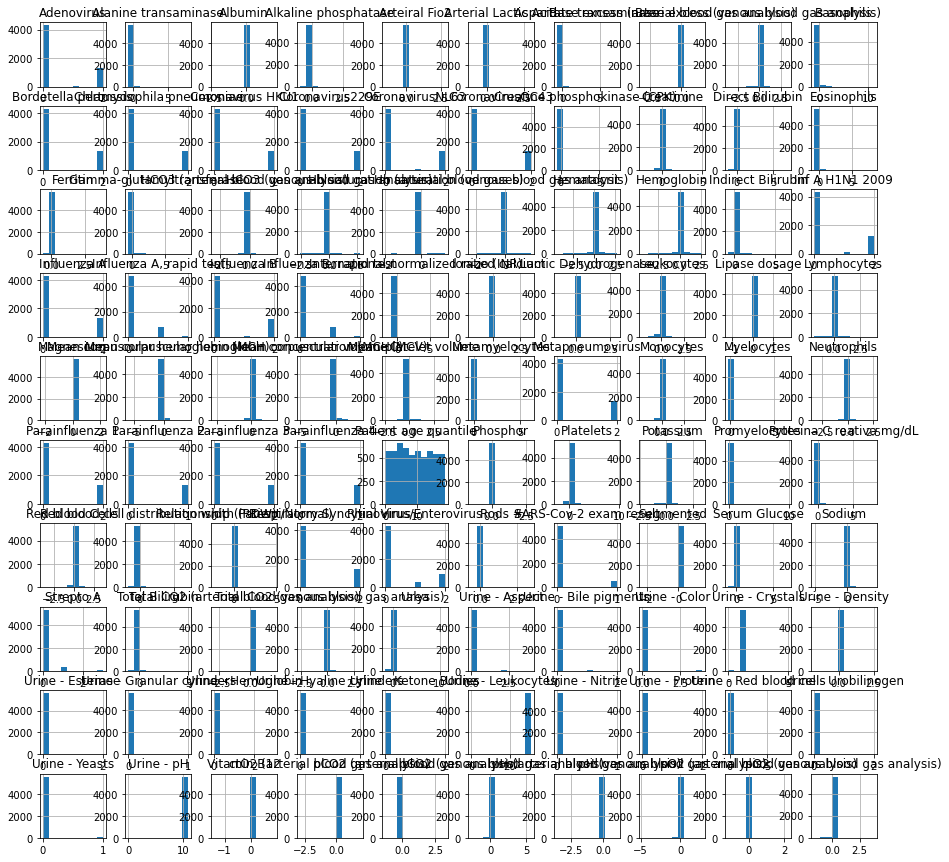

In [1162]:
df.hist(figsize=(15,15))

In [1163]:
#outlier present in dataset
#remove outlier
#z=np.abs(zscore(df))
#df=df[(z<3).all(axis=1)]
#df.shape


In [1164]:
df['SARS-Cov-2 exam result'].isin([1]).sum()

558

In [1165]:
x=df.drop('SARS-Cov-2 exam result',axis=1)
y=df['SARS-Cov-2 exam result']
print(x.shape,y.shape)

(5644, 99) (5644,)


In [1166]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

In [1167]:
lr=LogisticRegression()
mul_nb=MultinomialNB()
gaus_nb=GaussianNB()
svr=SVC()
dtree_reg=DecisionTreeClassifier()
kn_reg=KNeighborsClassifier()
sgd_reg=SGDClassifier()
gradient_reg=GradientBoostingClassifier()
ada_reg=AdaBoostClassifier()
rand_reg=RandomForestClassifier()

In [1168]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('GaussianNB',gaus_nb))
#models.append(('MultinomialNB',mul_nb))
models.append(('Gradient Boost',gradient_reg))
models.append(('Ada Boost',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))

In [1169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [1170]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    roc_auc_score_list.append(roc_auc_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    precission_score_list.append(precision_score(y_test,y_pred))
    recall_score_list.append(recall_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [1171]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list,'roc_auc_score':roc_auc_score_list,'f1_score':f1_score_list,'precision_Score':precission_score_list,'recall_score':recall_score_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score,roc_auc_score,f1_score,precision_Score,recall_score
0,LogisticRegression,0.902730,0.911426,0.545317,0.166667,0.833333,0.092593
1,SVC,0.901134,0.904340,0.500000,0.000000,0.000000,0.000000
2,DecisionTreeClassifier,0.892102,0.897254,0.525062,0.107692,0.318182,0.064815
3,KNeighborsClassifier,0.899717,0.903454,0.503650,0.018018,0.333333,0.009259
4,SGDClassifier,0.825557,0.908769,0.527288,0.104348,0.857143,0.055556
5,GaussianNB,0.320835,0.174491,0.514605,0.178131,0.098441,0.935185
6,Gradient Boost,0.902554,0.906997,0.538728,0.146341,0.600000,0.083333
7,Ada Boost,0.899187,0.906997,0.534588,0.132231,0.615385,0.074074
8,RandomForestClassifier,0.900781,0.906112,0.517539,0.070175,0.666667,0.037037


In [1184]:
#from above matrix gradientboosting Classifier working better compare to other estimator .
#fine tuning the model
params_={'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}
grid_cv=GridSearchCV(gradient_reg,params_,cv=10)
grid_cv.fit(x,y)
print(grid_cv.best_params_)


{'learning_rate': 0.1}


In [1186]:
gradient_reg=GradientBoostingClassifier(learning_rate=0.1)
gradient_reg.fit(x_train,y_train)
y_pred=gradient_reg.predict(x_test)
print('score',gradient_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

#precision: percent of correct prediction(+ve/-ve)
#recall:what % of +ve cases did you catch
#f1-score:percent of correct +ve prediction


score 0.9140642303433001
accuracy_score 0.9069973427812223
confusion_matrix 
 [[1015    6]
 [  99    9]]
classification_report               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1021
           1       0.60      0.08      0.15       108

    accuracy                           0.91      1129
   macro avg       0.76      0.54      0.55      1129
weighted avg       0.88      0.91      0.87      1129



0.5387283708782239


Text(0, 0.5, 'True +ve Rate')

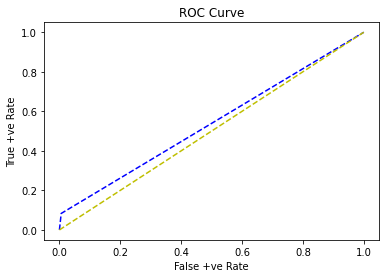

In [1187]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr,tpr,'b--')
plt.plot([0,1],[0,1],'y--')
#plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
